<a href="https://colab.research.google.com/github/abhianalyst561102/Internship/blob/main/EDA_MALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA done using manual methods

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/Mall.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Step 1: Identify and handle missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
# Step 2: Remove duplicate rows
print(f"\nNumber of rows before removing duplicates: {len(df)}")
df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df)}")


Number of rows before removing duplicates: 200
Number of rows after removing duplicates: 200


In [5]:
# Shape of the dataset
df_shape = df.shape
print(f"Shape of the dataset: {df_shape}")

Shape of the dataset: (200, 5)


In [6]:
# Change the gender in numeric
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [18]:
df.sample(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
52,53,0,31,43,54
25,26,1,29,28,82


In [20]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [24]:
# Rename column
df = df.rename(columns={'Annual Income (k$)': 'Annual_Income'})

In [25]:
# Rename the column
df = df.rename(columns={'Spending Score (1-100)': 'Spending_Score'})

In [29]:
df.describe()

,CustomerID,Gender,Age,Annual_Income_Score,Spending_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


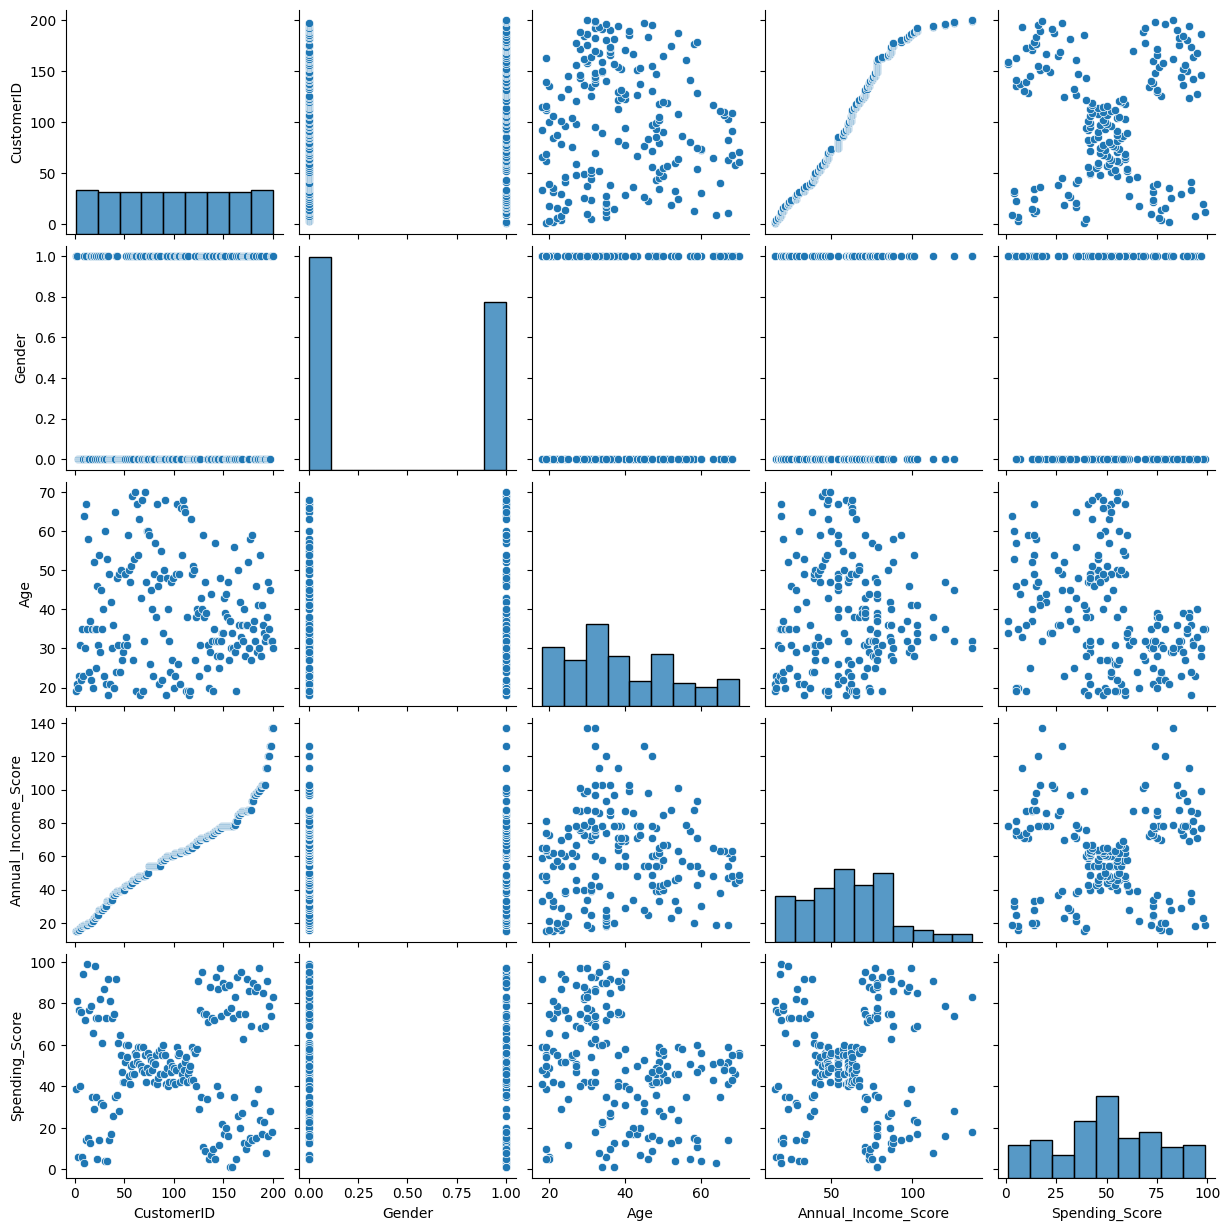

In [30]:
import seaborn as sns
sns.pairplot(df)

<ipython-input-34-04a7141c5720>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


<Axes: xlabel='Gender', ylabel='count'>

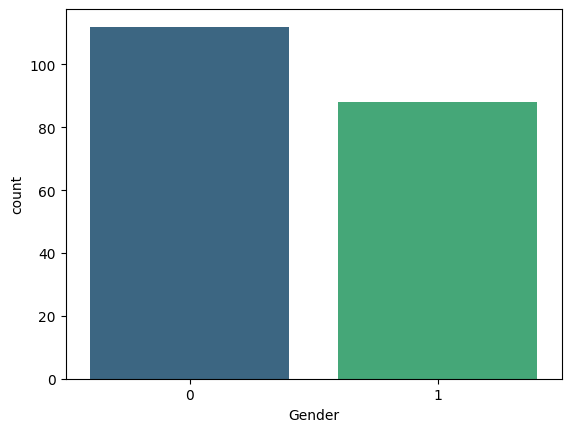

In [34]:
# column chart for gender count
sns.countplot(x='Gender', data=df, palette='viridis')

<Axes: >

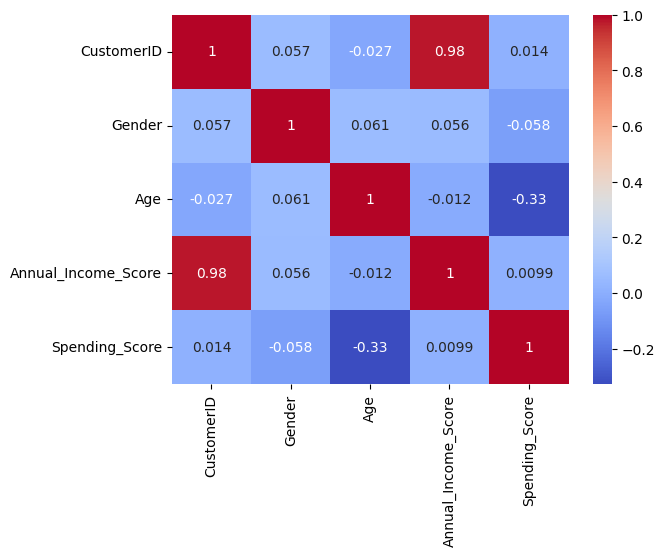

In [37]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Performed EDA using advanced ydata-profiling library

In [36]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e5be153cd511c9be9a6fd3113255bbe194b8e722eae849d3fbddda29f068830b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [38]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("Result.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 104.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
from google.colab import files

# Saves a html file
files.download('/content/Result.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>